<a href="https://colab.research.google.com/github/PhantomPheonix02/ICTAK-DSA_Assignments/blob/main/Handling_Missing_Values_and_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Missing Data**

Dealing with missing data is a common and inherent issue in data collection, especially when working with large datasets. There are various reasons for missing data, such as
* incomplete information provided by participants,
* non-response from those who decline to share information,
* poorly designed surveys, or
* removal of data for confidentiality reasons.


When not appropriately handled, missing data can bias the conclusions of all the statistical analyses on the data, leading the business to make wrong decisions.

This article will focus on some techniques to efficiently handle missing values and their implementations in Python.

We will illustrate the benefits and drawbacks of each technique to help you choose the right one for a given situation.

# **Identifying Missing data:**

Missing data occurs in different formats. This section explains the different types of missing data and how to identify them.

# Types of missing data:

There are three main types of missing data:
1.  Missing Completely at Random (MCAR),
2.  Missing at Random (MAR), and
3.  Missing Not at Random (MNAR).

It is important to have a better understanding of each one for choosing the appropriate methods to handle them.

**Missing Completely at Random (MCAR)**: Information was lost randomly but does not affect the rest of the data in any other way.

**Missing at Random (MAR)**: Probability of the value being missing is related to the value of the variable or other variables in the dataset. This means that not all the observations and variables have the same chance of being missing.

**Missing Not at Random (MNAR)**:  the probability of being missing is completely different for different values of the same variable, and these reasons can be unknown to us.





# Methods for identifying missing data:
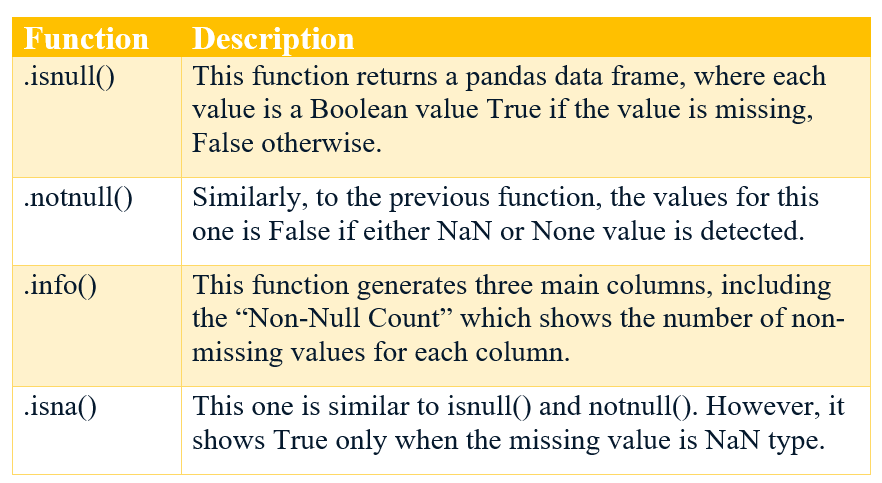

# Handling Missing Data

Multiple approaches exist for handling missing data. This section covers some of them along with their benefits and drawbacks.

To better illustrate the use case, we will be using the Loan Data available online.

Since the dataset does not have any missing values,  we will use a subset of the data (100 rows) and then manually introduce missing values.

# Dataset: Telecom Customer Churn

This dataset comes from an Iranian telecom company, with each row representing a customer over a year period. Along with a churn label, there is information on the customers' activity, such as call failures and subscription length.

# *Scenario:*
You have just been hired by a telecom company. A competitor has recently entered the market and is offering an attractive plan to new customers. The telecom company is worried that this competitor may start attracting its customers.

You have access to a dataset of the company's customers, including whether customers churned. The telecom company wants to know whether you can use this data to predict whether a customer will churn. They also want to know what factors increase the probability that a customer churns.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.



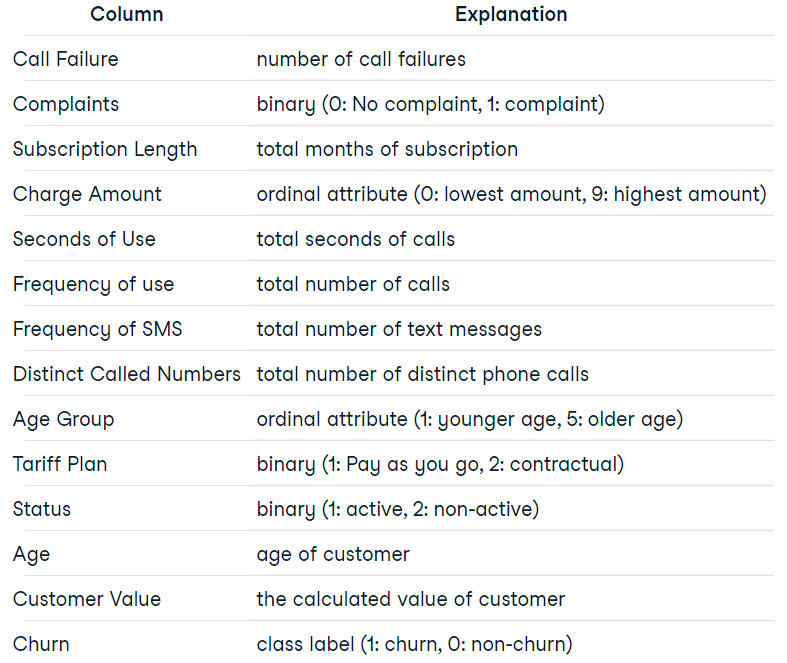

 Dataset: https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset



In [ ]:
# Importing Libraries

import pandas as pd

Read the first 100 rows of a CSV file named "customer_churn.csv"

In [ ]:
sample_customer_data = pd.read_csv('/content/Customer Churn.csv',  nrows=100)

sample_customer_data.info()

Let’s introduce 50% of missing values in each column of the dataframe using.

In [ ]:
import numpy as np
def introduce_nan(x,percentage):
  n = int(len(x)*(percentage - x.isna().mean()))
  idxs = np.random.choice(len(x), max(n,0), replace=False, p=x.notna()/x.notna().sum())
  x.iloc[idxs] = np.nan

This code defines a function called introduce_nan
that takes two arguments:
*  `x`, which is a pandas DataFrame or Series, and
*  `percentage`, which is a float representing the percentage of values in x that should be replaced with NaNs.

1.  The function first calculates the number of values to replace by subtracting the proportion of existing NaN values in x from the desired percentage, multiplying by the length of x, and converting to an integer.
2.  Next, the function uses NumPy's random.choice function to randomly select indices from x to replace with NaNs.
3. The replace=False argument ensures that each index is only selected once.
4.  The p argument specifies the probability of selecting each index, which is calculated as the proportion of non-NaN values in x.
5. Finally, the function sets the selected indices in x to NaN using the iloc attribute.

Overall, this function introduces missing values (NaNs) into a pandas DataFrame or Series by randomly selecting a specified percentage of values to replace with NaNs.

In [ ]:
sample_customer_data.apply(introduce_nan, percentage=.5)
sample_customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            50 non-null     float64
 1   Complains                50 non-null     float64
 2   Subscription  Length     50 non-null     float64
 3   Charge  Amount           50 non-null     float64
 4   Seconds of Use           50 non-null     float64
 5   Frequency of use         50 non-null     float64
 6   Frequency of SMS         50 non-null     float64
 7   Distinct Called Numbers  50 non-null     float64
 8   Age Group                50 non-null     float64
 9   Tariff Plan              50 non-null     float64
 10  Status                   50 non-null     float64
 11  Age                      50 non-null     float64
 12  Customer Value           50 non-null     float64
 13  Churn                    50 non-null     float64
dtypes: float64(14)
memory usage

In [ ]:
sample_customer_data.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,NaN,0.0,NaN,0.0,4370.0,NaN,5.0,NaN,NaN,1.0,NaN,30.0,197.640,NaN
1,NaN,NaN,39.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,46.035,0.0
2,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0,1.0,30.0,1536.520,0.0
3,NaN,NaN,38.0,0.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,15.0,240.020,0.0
4,NaN,0.0,NaN,0.0,2393.0,58.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,0.0


# Data Dropping

Using the dropna() function is the easiest way to remove observations or features with missing values from the dataframe.

1. Drop observations with missing values

  `dropna()`: drops all the rows with missing values.

  We can see that all the observations are dropped from the dataset, which can be especially dangerous for the rest of the analysis.

In [ ]:
drop_na_strategy = sample_customer_data.dropna()
drop_na_strategy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            0 non-null      float64
 1   Complains                0 non-null      float64
 2   Subscription  Length     0 non-null      float64
 3   Charge  Amount           0 non-null      float64
 4   Seconds of Use           0 non-null      float64
 5   Frequency of use         0 non-null      float64
 6   Frequency of SMS         0 non-null      float64
 7   Distinct Called Numbers  0 non-null      float64
 8   Age Group                0 non-null      float64
 9   Tariff Plan              0 non-null      float64
 10  Status                   0 non-null      float64
 11  Age                      0 non-null      float64
 12  Customer Value           0 non-null      float64
 13  Churn                    0 non-null      float64
dtypes: float64(14)
memory usage: 0.0 bytes

`dropna(how = ‘all’)`: the rows where all the column values are missing.

In [ ]:
drop_na_all_strategy = sample_customer_data.dropna(how="all")
 # (how = 'any)==>in that row, if any column is null, then drop
drop_na_all_strategy.info()

In [ ]:
# df.dropna()  ==> method for removing null ValuesView
# df.dropna(how='all') or df.dropna(how='any')
# df.dropna(thresh = number)  ==> Specify the number of NOT NULL values required to keep the row

From the output above, we notice there is no observation with all the columns missing.

`dropna(thresh = minimum_value)`: drop rows based on a threshold. This strategy sets a minimum number of missing values required to preserve the rows.

In [ ]:
drop_na_thres_strategy = sample_customer_data.dropna(thresh=0.6)
drop_na_thres_strategy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            50 non-null     float64
 1   Complains                50 non-null     float64
 2   Subscription  Length     50 non-null     float64
 3   Charge  Amount           50 non-null     float64
 4   Seconds of Use           50 non-null     float64
 5   Frequency of use         50 non-null     float64
 6   Frequency of SMS         50 non-null     float64
 7   Distinct Called Numbers  50 non-null     float64
 8   Age Group                50 non-null     float64
 9   Tariff Plan              50 non-null     float64
 10  Status                   50 non-null     float64
 11  Age                      50 non-null     float64
 12  Customer Value           50 non-null     float64
 13  Churn                    50 non-null     float64
dtypes: float64(14)
memory usage

Setting the threshold to 60%, the result is the same compared to the previous one.

# 2. Drop columns with missing values

The parameter `axis = 1` can be used to explicitly specify we are interested in columns rather than rows.

`dropna(axis = 1)`: drops all the columns with missing values.

`drop_na_cols_strategy = sample_customer_data.dropna(axis=1)`

In [ ]:
drop_na_cols_strategy = sample_customer_data.dropna(axis=1)
# columns with missing values will be dropped

drop_na_cols_strategy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Empty DataFrame


There are no more columns in the data. This is because all the columns have at least one missing value.

Like many other approaches, dropna() also has some pros and cons.

Pros
1. Straightforward and simple to use.
2. Beneficial when missing values have no importance.

Cons
1. Using this approach can lead to information loss, which can introduce bias to the final dataset.
2. This is not appropriate when the data is not missing completely at random.

# Mean/Median Imputation

Mean and median imputations are respectively used to replace missing values of a given column with the mean and median of the non-missing values in that column.

In Python, the fillna() function from pandas can be used to make these replacements.

In [ ]:
# mean of entire dataframe
mean_value = sample_customer_data.mean()
mean_imputation = sample_customer_data.fillna(mean_value)


# mean_col_name=df['col_name'].mean()  ==> mean of a particular col
# df1= df['col_name'].fillna(mean_col_name)


mean_imputation.head()

Illustration of Median method

In [ ]:
median_value = sample_customer_data.median()
median_imputation = sample_customer_data.fillna(median_value)
median_imputation.head()

* We cannot apply these two strategies to categorical columns. They can only work for numerical ones.
* Mean imputation is sensitive to outliers and may not be a good representation of the central tendency of the data. Similarly to the mean, the median also may not better represent the central tendency.
* Median imputation makes the assumption that the data is missing completely at random (MCAR), which is not always true.

# Outlier Detection

Outlier detection is the process of identifying data points that are significantly different from the rest.

Outlier detection, also known as anomaly detection, is a crucial task in data mining. It refers to the process of identifying data points that are significantly different from the rest of the data in a given dataset.

Outliers can cause issues in data analysis, as they can skew results and mislead statistical models. Different types of outliers can exist in a dataset.

A few of the most common types of outliers include the following -

**Global Outliers** - These are data points that are significantly different from the rest of the dataset. They are often caused by measurement errors, incorrect data entry, or rare events.

**Contextual Outliers** - These are data points that are considered outliers only in specific contexts. For example, a high income in a low-income neighborhood might be considered an outlier, but not in a high-income neighborhood.

**Collective Outliers** - These are groups of data points that are collectively different from the rest of the dataset. They might indicate a subgroup or a different underlying distribution of data.

# What are The Methods of Outlier Detection?

Let’s explore a few of the most common outlier detection methods in data mining to identify and detect outliers in a dataset.


1. **boxplot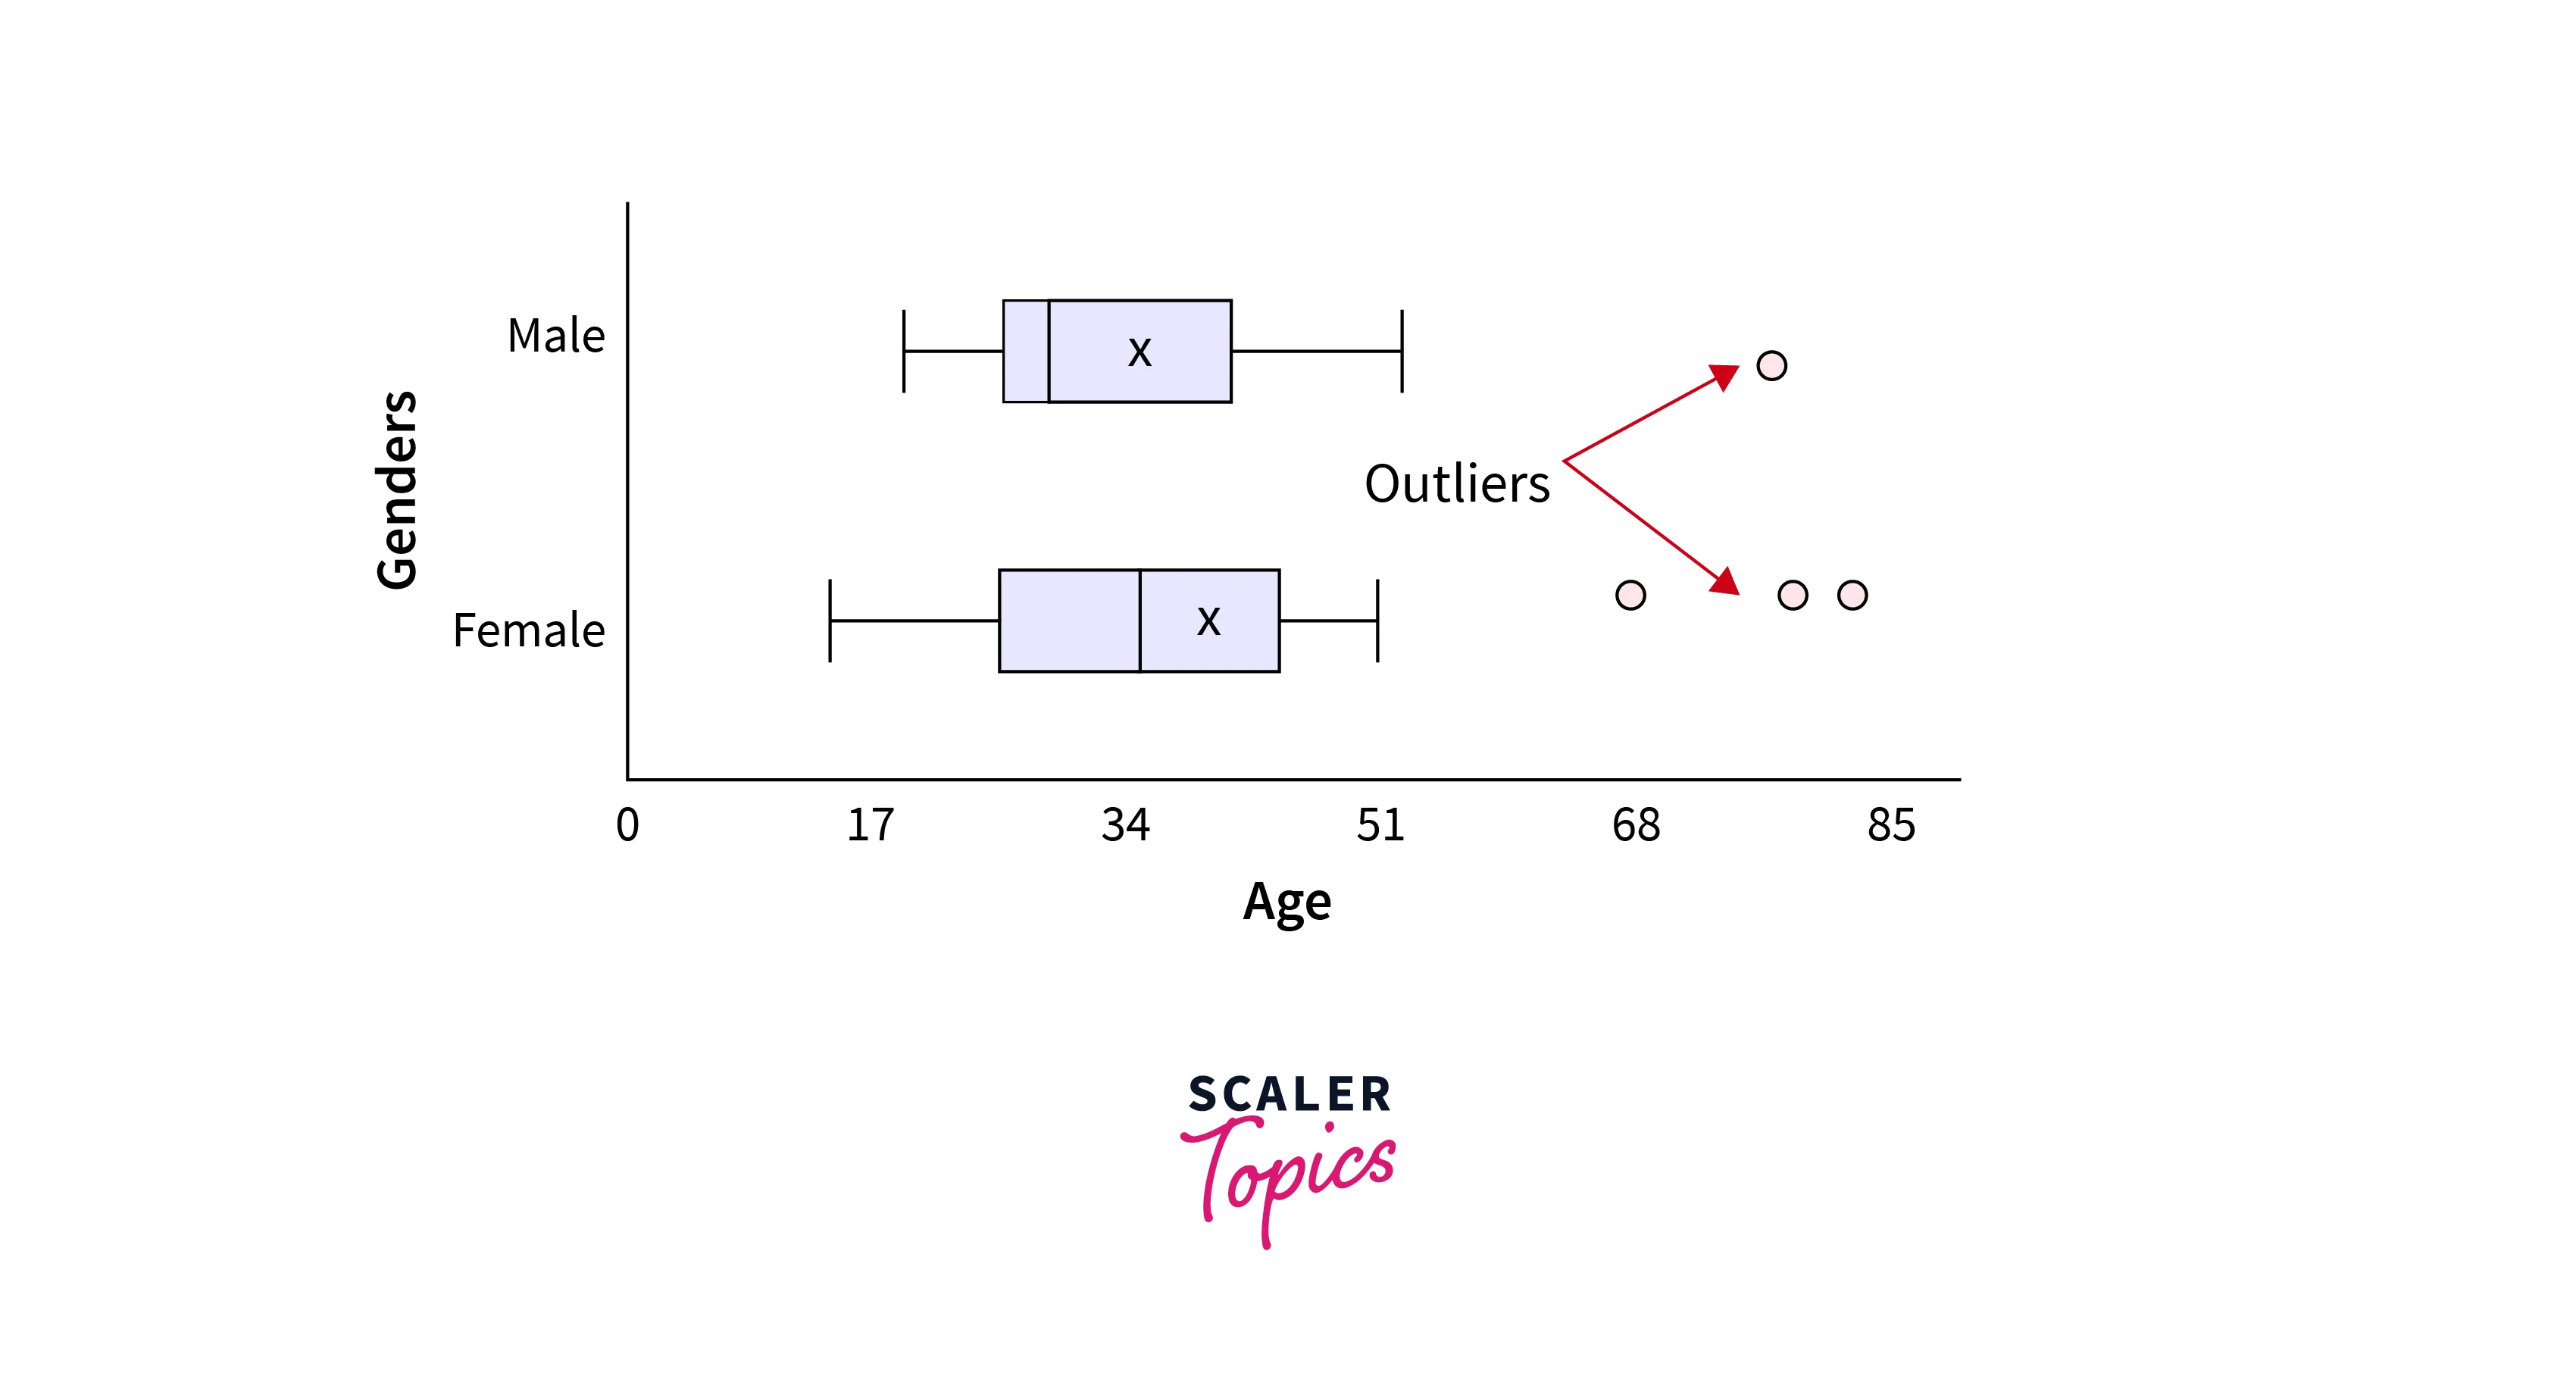**

Outliers in a dataset can be identified by plotting them as individual points outside the whiskers. These points are usually considered outliers if they fall over 1.5 times the interquartile range (IQR) outside the box. This method helps visualize the outliers in any feature. For example, in the figure above, points in blue and yellow colors would be considered outliers.



**IQR Method**

The Interquartile Range (IQR) method is one of the most common outlier detection methods in data mining. The IQR is calculated as the difference between the dataset's third quartile (Q3) and the first quartile (Q1). Q1 is the value at the 25th percentile, and Q3 is at the 75th percentile.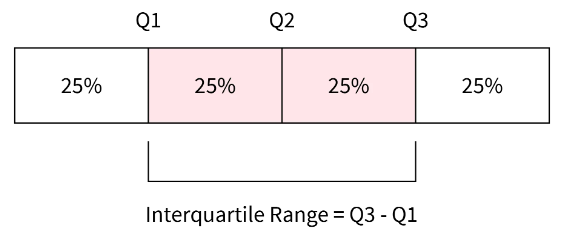

Outliers can be detected by identifying data points that fall
below Q1 - (1.5 * IQR) OR
above Q3 + (1.5 * IQR)
These points are considered significantly different from most of the data and can be labeled as outliers.


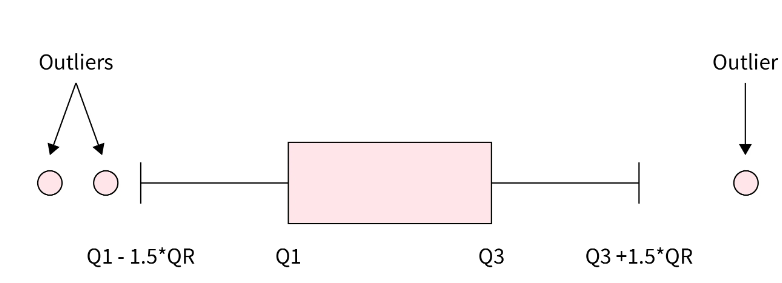

# Z-Score Method

The Z-score of a data point is calculated as the number of standard deviations it falls away from the mean of the dataset. Z-score represents a data point’s distance from the mean in terms of the standard deviation. Mathematically, the Z-score for a data point x is calculated as -

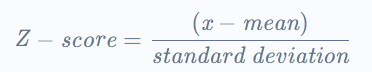

Using Z-Score, we can define the upper and lower bounds of a dataset. A data point with a Z-score greater than a certain threshold (usually 2.5 or 3) is considered an outlier.

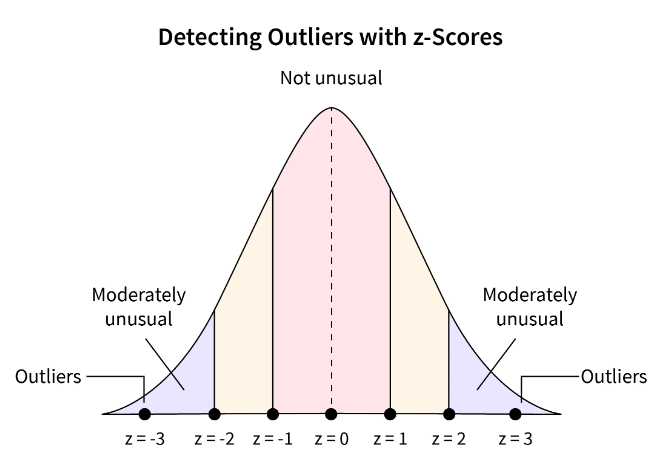